### Concept

# Saving Plots to Files
<img src = "images/logo.jpg" width="100" align="left">

<br><br><br><br>Ram Narasimhan

# Goals for this section:

1. Quickly Create some plots using MPL, SNS and Pandas
2. Save these plots to files

Almost always, after we create plots, we want to share them - with our colleagues or customers or others who are interested in our analysis.

In this notebook, we will create plots using 3 packages (MatPlotLib, Pandas and Seaborn). The plots themselves are not that important. But we will how we can save all these plots to files (PNG), which we can then include in our Word, PowerPoint, HTML or other documents.


In [ ]:
import numpy as np #a new module
import pandas as pd #we will see this more and more
import matplotlib.pyplot as plt #plotting module
import seaborn as sns # Seaborn for plotting and styling
sns.set(color_codes=True)

#shows the graphs in the Notebook itself. (INLINE)
%matplotlib inline 

# Create 3 Plots 

### Generate some dummy data
.
For all our plots, we will use this data frame. Note that it is a Pandas DataFrame.

In [ ]:
df = pd.DataFrame({'x':range(10), 'y': np.random.randint(10,100,size=10)})

In [ ]:
df.head()

# Part 1

### 1.1 Create matplotlib plot

In [ ]:
mpl_plot = plt.plot(df.x, df.y, 'k')
plt.title("matplotlib xy line plot")


### 1.2 Create same plot using Pandas

In [ ]:
pandas_plot = df.plot('x', 'y', color='k')
plt.title("Pandas Plot");


### 1.3 Create A Seaborn Plot

In [ ]:
seaborn_plot = sns.FacetGrid(df,  size=3, aspect= 2) #get the basic grid ready. Things can be 'mapped' onto this grid
seaborn_plot.map(plt.scatter, "x", "y")
seaborn_plot.map(plt.plot, "x", "y")
sns.plt.title("Seaborn Plot");

# Part 2: Save all 3 plots

### 2.1 Save a `matplotlib` Plot

In [ ]:
mpl_plot = plt.plot(df.x, df.y, 'k')
plt.title("matplotlib xy line plot")
plt.savefig("output/matplotlib_plot.png")
plt.close() #don't display the image here

In [98]:
# This is a bit more complicated. If you have the mpl plot stored as a variable, you have to first get the figure and then plot it.

for p in mpl_plot: #this is needed because mpl_plot is a list
    p.get_figure().savefig("output/matplotlib_plot.png")

### 2.2 Save a Pandas plot

If the Pandas plot has been stored to a variable, then we first need to `get_figure()` and only then savefig() will do the job.

Gory Details: This is because `df.plot()` saves it to an `AxesSubplot` type of object. Those cannot be directly saved. We first get the parent figure for the `AxesSubplot`, and then we can easily save it using `savefig`

In [83]:
fig = pandas_plot.get_figure()
fig.savefig ("output/Pandas.png")

In [85]:
#for the really curious
type(pandas_plot)

matplotlib.axes._subplots.AxesSubplot

### 2.3 Save a `Seaborn` Plot

In [86]:
seaborn_plot.savefig("output/seaborn_line_plot.png")

# Take Away

If you are paying attention, you would have already noticed the common function in all 3 types of plots. To save the figures, we just use one command: `savefig()`.

It is just that we had to make sure that we had the `Figure` object identified, before we could use the `savefig()` method on it.

![Questions](images/questions.png)

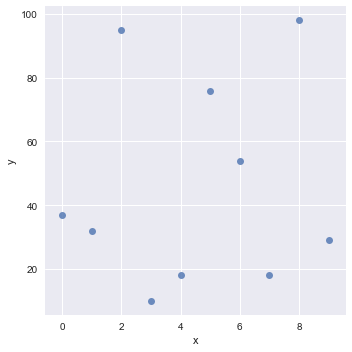

In [46]:
# Create scatterplot of dataframe
sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           #hue="z", # Set color
           line_kws={'linestyle': '-', # Set marker style
                        "s": 100}) # S marker size